This notebook analyses the stepresponse dataset for the weld dataset

In [12]:
import pandas as pd

file_path = '..\\data\\Dataset 1\\20241107_1700_Daten_P10114.csv'
df = pd.read_csv(file_path)

#set timestamp to floating Timestamp datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

print(df.head())

                      timestamp  time_min        IPOC    RIst/X    RIst/Y  \
0 2024-11-07 17:00:57.050835133       0.0  4228829442 -198.9533  249.4601   
1 2024-11-07 17:00:57.062834978       0.0  4228829448 -198.9538  249.4602   
2 2024-11-07 17:00:57.074835062       0.0  4228829454 -198.9533  249.4601   
3 2024-11-07 17:00:57.086835146       0.0  4228829460 -198.9533  249.4601   
4 2024-11-07 17:00:57.098834991       0.0  4228829466 -198.9533  249.4601   

     RIst/Z   RIst/A  RIst/B  RIst/C  WD/W02  ...  MD/LSZ  MD/PMT  PD/I  \
0  297.4513  90.0007  0.1187  0.3336     0.0  ...     0.0     0.0   0.0   
1  297.4528  90.0007  0.1187  0.3335     0.0  ...     0.0     0.0   0.0   
2  297.4513  90.0007  0.1187  0.3336     0.0  ...     0.0     0.0   0.0   
3  297.4513  90.0007  0.1187  0.3336     0.0  ...     0.0     0.0   0.0   
4  297.4513  90.0007  0.1187  0.3336     0.0  ...     0.0     0.0   0.0   

   PD/WF  PD/FR  PD/MO  PD/LA    PD/PG  WC/WFS  WC/WFSAN  
0    0.0   70.0    0.0    0

In [13]:
#check values for the column PD/MO
print(df['PD/MO'].unique())

[0.  4.  5.  1.  3.  2.  3.2 2.5]


Follow up questions:
- PD/MO should have values
- 0 - movement
- 1 - preheat
- 2 - welding
- 3(3.1) - measureing temp
- 4 - measuring height along the wall
- 5 - measuring cross section

What are the values 3.2 and 2.5?

In [14]:
#select important columns needed for the analysis
#,RIst/X,RIst/Y,RIst/Z,RIst/A,RIst/B,RIst/C,MD/LSZ,PD/WF,PD/FR,PD/MO,PD/LA
columns = ['timestamp','RIst/X','RIst/Y','RIst/Z','MD/LSZ','PD/WF','PD/FR','PD/MO','PD/LA']
df = df[columns]
#rename columns 
# PD/MO -> Mode
# PD/LA -> Layer
# PD/FR -> Feedrate
# PD/WF -> Wirefeed
# MD/LSZ -> Z-Height
#maybe need to add later more columns
df.columns = ['timestamp','X','Y','Z','Z-Height','Wirefeed','Feedrate','Mode','Layer']

In [34]:
def plot3D_plotly(df,mode):
    import plotly.express as px
    fig = px.scatter_3d(df[df['Mode']==mode], x='X', y='Y', z='Z-Height',color='Layer')
    fig.show()

In [15]:


#display the toolpath of xy coordinates

import seaborn as sns
import matplotlib.pyplot as plt
# print(df["Layer"].unique())
# #print uniwue Layer where Mode is 1
# print(df[df["Mode"]==1]["Layer"].unique())

# sns.scatterplot(x='X', y='Y',hue="Layer", data=df[(df["Mode"]==2)])
# plt.show()

import plotly.express as px

# Filter the data where Mode is 4
filtered_df = df[df["Mode"] == 4]

# Create a 3D scatter plot
fig = px.scatter_3d(filtered_df, x="X", y="Y", z="Z-Height", color="Layer", 
                    labels={"X": "X Coordinate", "Y": "Y Coordinate", "Z-Height": "Z Height"})
# Add title and stretch the Y-axis
fig.update_layout(
    title="3D Scatter Plot of X, Y, and Z-Height of Mode 4",
    title_x=0.5,
    width= 800,
    height=600,
    scene=dict(
        aspectmode="manual",
        aspectratio=dict(x=1, y=2, z=1)  # Stretching the Y-axis
    )
)

#fig.write_image("../plots/dataset1_00_Z-Height.png", width=1920, height=1080)
# Show the plot
fig.show()

# Filter the data where Mode is 5
filtered_df = df[df["Mode"] == 5]

# Create a 3D scatter plot
fig = px.scatter_3d(filtered_df, x="X", y="Y", z="Z-Height", color="Z-Height", 
                    labels={"X": "X Coordinate", "Y": "Y Coordinate", "Z-Height": "Z Height"})

fig.update_layout(
    title="3D Scatter Plot of X, Y, and Z-Height of Mode 5",
    title_x=0.5,
    width= 800,
    height=600,
    scene=dict(
        aspectmode="manual",
        aspectratio=dict(x=1, y=1, z=1)  # Stretching the Y-axis
    )
)

# Show the plot
fig.show()

From the Z heigth we can see there are many outliers in the beginning and end of the welding process. By removing the first and last x% of each layer we can remove these outliers. Also looking at mode 5 we can see that this data is not very usefull for the stepresponse since its only a few points int he beginning of the weld process, it would be interesting to measure the thickness on each step response to see if the thickness/volume of the weld is constant or not.

In [32]:
# min and max values of y coordinates for Mode 5 per layer
df_mode_4 = df[df["Mode"] == 4]
min_y = df_mode_4.groupby("Layer")["Y"].min().min()
max_y = df_mode_4.groupby("Layer")["Y"].max().max()
print(min_y)
print(max_y)

range = max_y - min_y

cutoff = 0.05

-10.0015
170.0017


ValueError: Argument Z must be 2-dimensional.

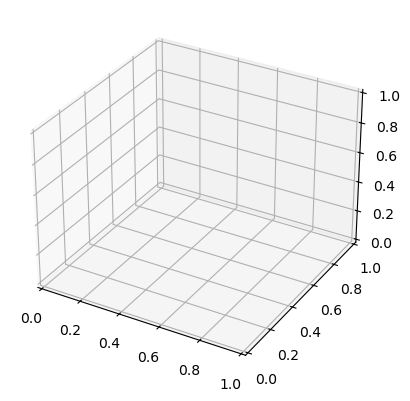

In [35]:
# remove rows were the y coodinate is less than 5 percent of the range of y coordinates
df_cleaned = df[(df["Y"]> min_y + range * cutoff) & (df["Y"] < max_y - range * cutoff)]
plot3D_wireframe(df_cleaned,4)